# Cleaning & EDA

## Import

In [29]:
# Import libraries
import pandas as pd
import string
import json
import praw

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Import Ivan's df as csv
reddits = pd.read_csv('reddit_posts.csv')
reddits.head()

,Title,Post Text,ID,Score,Total Comments,Post URL,Subreddit,Post Type
0,Daily Fasting Check-in!,"* **Type** of fast (water, juice, smoking, etc...",16o7z6r,1,2,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot
1,I decided who I wanted to be and I became her 💅🏽,"So a little background: I’m 39, have birthed t...",16ntqoy,1176,36,https://i.redd.it/fclkjnwhmgpb1.jpg,intermittentfasting,hot
2,Some photos from a past vacation came up as a ...,I remember being miserable and insecure the en...,16ni914,1505,77,https://www.reddit.com/gallery/16ni914,intermittentfasting,hot
3,"Anybody find IF, lose weight, and then lose mo...",I know I am an idiot.,16nuqx9,198,78,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot
4,2 and a half months of IF,From 234 to 211 in 2.5 months. It works! Once ...,16nuxqs,180,12,https://i.redd.it/30yqmtsdvgpb1.jpg,intermittentfasting,hot


In [3]:
# Create new column 'title_&_text', an addition of words from the 'Title' and 'Post Text' columns
# To get more words and gather more sentiments

reddits['title_&_text'] = reddits['Title'] + ' ' + reddits['Post Text']

reddits.head()

,Title,Post Text,ID,Score,Total Comments,Post URL,Subreddit,Post Type,title_&_text
0,Daily Fasting Check-in!,"* **Type** of fast (water, juice, smoking, etc...",16o7z6r,1,2,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot,Daily Fasting Check-in! * **Type** of fast (wa...
1,I decided who I wanted to be and I became her 💅🏽,"So a little background: I’m 39, have birthed t...",16ntqoy,1176,36,https://i.redd.it/fclkjnwhmgpb1.jpg,intermittentfasting,hot,I decided who I wanted to be and I became her ...
2,Some photos from a past vacation came up as a ...,I remember being miserable and insecure the en...,16ni914,1505,77,https://www.reddit.com/gallery/16ni914,intermittentfasting,hot,Some photos from a past vacation came up as a ...
3,"Anybody find IF, lose weight, and then lose mo...",I know I am an idiot.,16nuqx9,198,78,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot,"Anybody find IF, lose weight, and then lose mo..."
4,2 and a half months of IF,From 234 to 211 in 2.5 months. It works! Once ...,16nuxqs,180,12,https://i.redd.it/30yqmtsdvgpb1.jpg,intermittentfasting,hot,2 and a half months of IF From 234 to 211 in 2...


## Cleaning

In [4]:
# Check how many rows with null values in the 'Post Text' column
reddits.isnull().sum()

Title               0
Post Text         245
ID                  0
Score               0
Total Comments      0
Post URL            0
Subreddit           0
Post Type           0
title_&_text      245
dtype: int64

In [5]:
# Remove rows with null values in the 'Post Text' column
reddits.dropna(subset=['title_&_text'], inplace=True)

# Check if null values still exist
reddits.isnull().sum()

Title             0
Post Text         0
ID                0
Score             0
Total Comments    0
Post URL          0
Subreddit         0
Post Type         0
title_&_text      0
dtype: int64

AnorexiaNervosa        1588
intermittentfasting     901
Name: Subreddit, dtype: int64


Text(0.5, 0, 'Number of Posts')

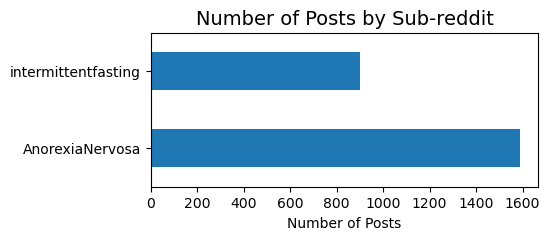

In [6]:
# Count the total number of posts for each subreddit
subreddit_count = reddits['Subreddit'].value_counts()

print(subreddit_count)
subreddit_count.plot(kind='barh', figsize=(5,2))
plt.title('Number of Posts by Sub-reddit', fontsize=14)
plt.xlabel('Number of Posts', fontsize=10)

In [7]:
# Check data type
reddits.dtypes

Title             object
Post Text         object
ID                object
Score              int64
Total Comments     int64
Post URL          object
Subreddit         object
Post Type         object
title_&_text      object
dtype: object

In [8]:
# Check columnn headers
reddits.columns

Index(['Title', 'Post Text', 'ID', 'Score', 'Total Comments', 'Post URL',
       'Subreddit', 'Post Type', 'title_&_text'],
      dtype='object')

In [9]:
# Lowercase column headers and transform into snakecase
reddits.columns = [col.strip().lower().replace(" ", "_") for col in reddits.columns]

reddits.columns

Index(['title', 'post_text', 'id', 'score', 'total_comments', 'post_url',
       'subreddit', 'post_type', 'title_&_text'],
      dtype='object')

In [11]:
# Define a function that does the following cleaning steps:
## removes punctuation,
## tokenize,
## lowercase,
## removes stopwords,
## stemming,
## lemmatizing

# And returns stemmed text in a column and lemmatized text in the next column

ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean(text):

    remove_punct = "".join([char for char in text if char not in string.punctuation])

    tokenize = re.split('\W+', remove_punct)
    
    lowercase = [word.lower() for word in tokenize]
    
    custom_stopwords = ['feel', 'like', 'im', 'want', 'know', 'anorexia', 'nervosa', 'intermittent', 'fasting',
                        'every', 'time']
    all_stopwords = stopwords.words('english') + custom_stopwords
    no_stopwords = [word for word in lowercase if word not in all_stopwords]
    
    stemmed = [ps.stem(word) for word in no_stopwords]
    
    lemmatized = [wn.lemmatize(word) for word in no_stopwords]
    
    return (stemmed, lemmatized)

reddits[['title_text_stemmed', 'title_text_lemmatized']] = reddits['title_&_text'].apply(clean).apply(pd.Series)

reddits.head()

,title,post_text,id,score,total_comments,post_url,subreddit,post_type,title_&_text,title_text_stemmed,title_text_lemmatized
0,Daily Fasting Check-in!,"* **Type** of fast (water, juice, smoking, etc...",16o7z6r,1,2,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot,Daily Fasting Check-in! * **Type** of fast (wa...,"[daili, checkin, type, fast, water, juic, smok...","[daily, checkin, type, fast, water, juice, smo..."
1,I decided who I wanted to be and I became her 💅🏽,"So a little background: I’m 39, have birthed t...",16ntqoy,1176,36,https://i.redd.it/fclkjnwhmgpb1.jpg,intermittentfasting,hot,I decided who I wanted to be and I became her ...,"[decid, want, becam, littl, background, 39, bi...","[decided, wanted, became, little, background, ..."
2,Some photos from a past vacation came up as a ...,I remember being miserable and insecure the en...,16ni914,1505,77,https://www.reddit.com/gallery/16ni914,intermittentfasting,hot,Some photos from a past vacation came up as a ...,"[photo, past, vacat, came, memori, today, real...","[photo, past, vacation, came, memory, today, r..."
3,"Anybody find IF, lose weight, and then lose mo...",I know I am an idiot.,16nuqx9,198,78,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot,"Anybody find IF, lose weight, and then lose mo...","[anybodi, find, lose, weight, lose, motiv, alw...","[anybody, find, lose, weight, lose, motivation..."
4,2 and a half months of IF,From 234 to 211 in 2.5 months. It works! Once ...,16nuxqs,180,12,https://i.redd.it/30yqmtsdvgpb1.jpg,intermittentfasting,hot,2 and a half months of IF From 234 to 211 in 2...,"[2, half, month, 234, 211, 25, month, work, go...","[2, half, month, 234, 211, 25, month, work, go..."


In [12]:
reddits.columns

Index(['title', 'post_text', 'id', 'score', 'total_comments', 'post_url',
       'subreddit', 'post_type', 'title_&_text', 'title_text_stemmed',
       'title_text_lemmatized'],
      dtype='object')

## EDA

### Top 3 most relevant and popular posts of each sub-reddits

The **'score'** shows how relevant the users found the posts.
The **'total_comments'** shows how popular the post is.

We will sort the posts of each sub-reddit by 'score' and 'total_comments' to see which are the top 3 most relevant and popular posts of each sub-reddit respectively.

In addition, we will create an interaction term, **'trending'**, which is a multiplication of 'score' and 'total_comments' to identify the top 3 'trending' posts of each sub-reddit.

trending = score * total_comments

In [13]:
# Create an interaction term, 'trending'

reddits['trending'] = reddits['score'] * reddits['total_comments']
reddits.head()

,title,post_text,id,score,total_comments,post_url,subreddit,post_type,title_&_text,title_text_stemmed,title_text_lemmatized,trending
0,Daily Fasting Check-in!,"* **Type** of fast (water, juice, smoking, etc...",16o7z6r,1,2,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot,Daily Fasting Check-in! * **Type** of fast (wa...,"[daili, checkin, type, fast, water, juic, smok...","[daily, checkin, type, fast, water, juice, smo...",2
1,I decided who I wanted to be and I became her 💅🏽,"So a little background: I’m 39, have birthed t...",16ntqoy,1176,36,https://i.redd.it/fclkjnwhmgpb1.jpg,intermittentfasting,hot,I decided who I wanted to be and I became her ...,"[decid, want, becam, littl, background, 39, bi...","[decided, wanted, became, little, background, ...",42336
2,Some photos from a past vacation came up as a ...,I remember being miserable and insecure the en...,16ni914,1505,77,https://www.reddit.com/gallery/16ni914,intermittentfasting,hot,Some photos from a past vacation came up as a ...,"[photo, past, vacat, came, memori, today, real...","[photo, past, vacation, came, memory, today, r...",115885
3,"Anybody find IF, lose weight, and then lose mo...",I know I am an idiot.,16nuqx9,198,78,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot,"Anybody find IF, lose weight, and then lose mo...","[anybodi, find, lose, weight, lose, motiv, alw...","[anybody, find, lose, weight, lose, motivation...",15444
4,2 and a half months of IF,From 234 to 211 in 2.5 months. It works! Once ...,16nuxqs,180,12,https://i.redd.it/30yqmtsdvgpb1.jpg,intermittentfasting,hot,2 and a half months of IF From 234 to 211 in 2...,"[2, half, month, 234, 211, 25, month, work, go...","[2, half, month, 234, 211, 25, month, work, go...",2160


In [14]:
# Sort data by score
reddits_by_score = reddits.sort_values(by=['subreddit', 'score'], ascending=[True, False])

# Define a function to show top 3 scores of each subreddit
def top_3(subreddit):
    return subreddit.head(3)

top_scores = reddits_by_score.groupby('subreddit', group_keys=False).apply(top_3).reset_index(drop=True)

top_scores

,title,post_text,id,score,total_comments,post_url,subreddit,post_type,title_&_text,title_text_stemmed,title_text_lemmatized,trending
0,if i get called “fatphobic” one more time,there is a person who i went to school with wh...,h17p1u,569,42,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,top,if i get called “fatphobic” one more time ther...,"[get, call, fatphob, one, person, went, school...","[get, called, fatphobic, one, person, went, sc...",23898
1,What the fuck is up with the guilt tripping of...,"If I remove a post, it's because you broke a r...",f13q2c,475,22,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,top,What the fuck is up with the guilt tripping of...,"[fuck, guilt, trip, mod, remov, post, broke, r...","[fuck, guilt, tripping, mod, remove, post, bro...",10450
2,Does anyone else get a mild sense of superiori...,I keep thinking “at least I’m not polluting my...,hmr5l2,464,35,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,top,Does anyone else get a mild sense of superiori...,"[anyon, els, get, mild, sens, superior, eat, d...","[anyone, else, get, mild, sense, superiority, ...",16240
3,I did it! I reached my goal weight!,This before picture wasn’t even the worst of i...,1331wwo,8756,170,https://i.redd.it/q6ijnslliwwa1.jpg,intermittentfasting,top,I did it! I reached my goal weight! This befor...,"[reach, goal, weight, pictur, even, worst, gue...","[reached, goal, weight, picture, even, worst, ...",1488520
4,F/24/5’3 145 pounds - 112 pounds,F/24/5’3\n\n145 pounds - 112 pounds \n\nAround...,xn5mfg,7054,250,https://i.redd.it/i8n09xnvrvp91.jpg,intermittentfasting,top,F/24/5’3 145 pounds - 112 pounds F/24/5’3\n\n1...,"[f245, 3, 145, pound, 112, pound, f245, 3, 145...","[f245, 3, 145, pound, 112, pound, f245, 3, 145...",1763500
5,2 year progress 110 lbs lost,I started with omad + keto sw:350 cw:240\nSwit...,zjf231,6977,66,https://i.redd.it/7iz22mgcde5a1.jpg,intermittentfasting,top,2 year progress 110 lbs lost I started with om...,"[2, year, progress, 110, lb, lost, start, omad...","[2, year, progress, 110, lb, lost, started, om...",460482


In [15]:
# Sort data by total_comments
reddits_by_comments = reddits.sort_values(by=['subreddit', 'total_comments'], ascending=[True, False])

top_comments = reddits_by_comments.groupby('subreddit', group_keys=False).apply(top_3).reset_index(drop=True)

top_comments

,title,post_text,id,score,total_comments,post_url,subreddit,post_type,title_&_text,title_text_stemmed,title_text_lemmatized,trending
0,What was the dumbest thing your psychologist/d...,write),150f8g1,62,131,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,hot,What was the dumbest thing your psychologist/d...,"[dumbest, thing, psychologistdoctornutritionis...","[dumbest, thing, psychologistdoctornutritionis...",8122
1,what started your ed?,i’m curious as to what started it for you guys...,15agdip,78,127,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,hot,what started your ed? i’m curious as to what s...,"[start, ed, curiou, start, guy, think, restric...","[started, ed, curious, started, guy, think, re...",9906
2,What Anorexia stereotype do you hate the most?...,"Personally, I hate the stereotype that Anorexi...",uhmgy6,191,100,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,top,What Anorexia stereotype do you hate the most?...,"[stereotyp, hate, tw, person, hate, stereotyp,...","[stereotype, hate, tw, personally, hate, stere...",19100
3,300 to 160 in 2 years 9 months,I woke up one morning and decided I didn't wan...,12nir5c,5524,311,https://www.reddit.com/gallery/12nir5c,intermittentfasting,top,300 to 160 in 2 years 9 months I woke up one m...,"[300, 160, 2, year, 9, month, woke, one, morn,...","[300, 160, 2, year, 9, month, woke, one, morni...",1717964
4,Wife is sick without breakfast,"My wife (28yo, 5'6, 120 lbs) would like to get...",16j6uos,240,271,https://www.reddit.com/r/intermittentfasting/c...,intermittentfasting,hot,"Wife is sick without breakfast My wife (28yo, ...","[wife, sick, without, breakfast, wife, 28yo, 5...","[wife, sick, without, breakfast, wife, 28yo, 5...",65040
5,"I give the IF, no dairy and getting dumped by ...",1 year apart,12wiqbx,3946,262,https://i.redd.it/4resdbo5lpva1.jpg,intermittentfasting,top,"I give the IF, no dairy and getting dumped by ...","[give, dairi, get, dump, fiancé, diet, 1010, 1...","[give, dairy, getting, dumped, fiancé, diet, 1...",1033852


In [16]:
# Sort data by trending
reddits_by_trending = reddits.sort_values(by=['subreddit', 'trending'], ascending=[True, False])

top_trending = reddits_by_trending.groupby('subreddit', group_keys=False).apply(top_3).reset_index(drop=True)

top_trending

,title,post_text,id,score,total_comments,post_url,subreddit,post_type,title_&_text,title_text_stemmed,title_text_lemmatized,trending
0,How do people with anorexia survive?,I’ve always wondered how people with ana make ...,13zkei8,266,98,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,top,How do people with anorexia survive? I’ve alwa...,"[peopl, surviv, alway, wonder, peopl, ana, mak...","[people, survive, always, wondered, people, an...",26068
1,if i get called “fatphobic” one more time,there is a person who i went to school with wh...,h17p1u,569,42,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,top,if i get called “fatphobic” one more time ther...,"[get, call, fatphob, one, person, went, school...","[get, called, fatphobic, one, person, went, sc...",23898
2,What Anorexia stereotype do you hate the most?...,"Personally, I hate the stereotype that Anorexi...",uhmgy6,191,100,https://www.reddit.com/r/AnorexiaNervosa/comme...,AnorexiaNervosa,top,What Anorexia stereotype do you hate the most?...,"[stereotyp, hate, tw, person, hate, stereotyp,...","[stereotype, hate, tw, personally, hate, stere...",19100
3,F/24/5’3 145 pounds - 112 pounds,F/24/5’3\n\n145 pounds - 112 pounds \n\nAround...,xn5mfg,7054,250,https://i.redd.it/i8n09xnvrvp91.jpg,intermittentfasting,top,F/24/5’3 145 pounds - 112 pounds F/24/5’3\n\n1...,"[f245, 3, 145, pound, 112, pound, f245, 3, 145...","[f245, 3, 145, pound, 112, pound, f245, 3, 145...",1763500
4,300 to 160 in 2 years 9 months,I woke up one morning and decided I didn't wan...,12nir5c,5524,311,https://www.reddit.com/gallery/12nir5c,intermittentfasting,top,300 to 160 in 2 years 9 months I woke up one m...,"[300, 160, 2, year, 9, month, woke, one, morn,...","[300, 160, 2, year, 9, month, woke, one, morni...",1717964
5,I did it! I reached my goal weight!,This before picture wasn’t even the worst of i...,1331wwo,8756,170,https://i.redd.it/q6ijnslliwwa1.jpg,intermittentfasting,top,I did it! I reached my goal weight! This befor...,"[reach, goal, weight, pictur, even, worst, gue...","[reached, goal, weight, picture, even, worst, ...",1488520


### 10 most commonly used unigrams

In [27]:
# Define a function to find the top 10 most commonly used unigrams

def top_10_words(df, column_names):
    # Instantiate CountVectorizer
    cv = CountVectorizer(stop_words='english')
    
    # Create dataframes for top stemmed and lemmatized words of both subreddits to store results
    top_words_stemmed = pd.DataFrame()
    top_words_lemmatized = pd.DataFrame()
    
    # Group the dataframe by 'subreddit'
    grouped = df.groupby('subreddit')
    
    for column_name in column_names:
        for subreddit, group_df in grouped:
            
            # Combine the lists of words into a single string for each row
            group_df[column_name] = group_df[column_name].apply(lambda x: ' '.join(x))
            
            # Fit and transform CountVectorizer on the specified column
            X = cv.fit_transform(group_df[column_name])
            
            # Sum the counts of each word
            word_counts = X.sum(axis=0)
            
            # Create a dataframe with words and their corresponding counts
            word_count_df = pd.DataFrame({
                'Word': cv.get_feature_names_out(),
                'Count': word_counts.tolist()[0]
            })
            
            # Sort the dataframe by count in descending order
            word_count_df = word_count_df.sort_values(by='Count', ascending=False)
            
            # Take the top 10 words
            top_10_words = word_count_df.head(10)
            
            # Store the results in the corresponding dataframes
            if 'stemmed' in column_name:
                top_words_stemmed[subreddit] = top_10_words['Word'].tolist()
            elif 'lemmatized' in column_name:
                top_words_lemmatized[subreddit] = top_10_words['Word'].tolist()
    
    return top_words_stemmed, top_words_lemmatized

top_stemmed, top_lemmatized = top_10_words(reddits, ['title_text_stemmed', 'title_text_lemmatized'])


In [18]:
# Top 10 unigrams (stemmed) for each subreddit
top_stemmed

,AnorexiaNervosa,intermittentfasting
0,eat,eat
1,weight,day
2,food,fast
3,realli,weight
4,make,start
5,think,week
6,day,hour
7,dont,month
8,bodi,work
9,look,tri


In [19]:
# Top 10 unigrams (stemmed) for each subreddit
top_lemmatized

,AnorexiaNervosa,intermittentfasting
0,weight,day
1,eating,weight
2,eat,fast
3,food,week
4,really,eating
5,day,eat
6,dont,hour
7,make,month
8,body,started
9,ed,ive


The top 10 commonly used unigrams are not very insightful as they contain mainly words about **weight, eating and timeframe** across both subreddits.

Majority of the words are the same in both stemmed and lemmatized.

### 10 most commonly used bigrams

In [20]:
# Define a function to find the top 10 commonly used bigrams

def top_10_bigrams(df, column_names):
    # Inistantiate CountVectorizer for bigrams
    cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
    
    # Create dataframes for top stemmed and lemmatized words of both subreddits to store results
    top_bigrams_stemmed = pd.DataFrame()
    top_bigrams_lemmatized = pd.DataFrame()
    
    # Group the dataFrame by 'subreddit'
    grouped = df.groupby('subreddit')
    
    for column_name in column_names:
        for subreddit, group_df in grouped:
            
            # Combine the lists of words into a single string for each row
            group_df[column_name] = group_df[column_name].apply(lambda x: ' '.join(x))
            
            # Fit and transform CountVectorizer on the specified column
            X = cv.fit_transform(group_df[column_name])
            
            # Sum the counts of each bigram
            bigram_counts = X.sum(axis=0)
            
            # Create a dataframe with bigrams and their corresponding counts
            bigram_count_df = pd.DataFrame({
                'Bigram': cv.get_feature_names_out(),
                'Count': bigram_counts.tolist()[0]
            })
            
            # Sort the dataframe by count in descending order
            bigram_count_df = bigram_count_df.sort_values(by='Count', ascending=False)
            
            # Take the top 10 bigrams
            top_10_bigrams = bigram_count_df.head(10)
            
            # Store the results in the corresponding dataframes
            if 'stemmed' in column_name:
                top_bigrams_stemmed[subreddit] = top_10_bigrams['Bigram'].tolist()
            elif 'lemmatized' in column_name:
                top_bigrams_lemmatized[subreddit] = top_10_bigrams['Bigram'].tolist()
    
    return top_bigrams_stemmed, top_bigrams_lemmatized

top_bigrams_stemmed, top_bigrams_lemmatized = top_10_bigrams(reddits, ['title_text_stemmed', 'title_text_lemmatized'])

In [21]:
# Top 10 bigrams (stemmed) for each subreddit
top_bigrams_stemmed

,AnorexiaNervosa,intermittentfasting
0,eat disord,lose weight
1,anyon els,weight loss
2,gain weight,break fast
3,lose weight,eat window
4,weight gain,hour fast
5,weight loss,day week
6,healthi weight,black coffe
7,year ago,hour day
8,weight restor,fast start
9,month ago,anyon els


In [22]:
# Top 10 bigrams (lemmatized) for each subreddit
top_bigrams_lemmatized

,AnorexiaNervosa,intermittentfasting
0,eating disorder,weight loss
1,lose weight,lose weight
2,gain weight,eating window
3,gained weight,break fast
4,weight loss,hour fast
5,gaining weight,day week
6,healthy weight,losing weight
7,weight gain,black coffee
8,year ago,hour day
9,losing weight,month ago


The bigrams are more insightful as they provide a little more context to the words.

Though both subreddits talked about eating habits, the bigrams imply that posts on **r/AnorexiaNervosa focus more on weight gain/loss**, while posts on **r/intermittentfasting focus more on eating times**.

**Stemming appears to be a better cleaning method** than lemmatizing as the accuracy of words offered by lemmatization generated variations of the same words. For example, "lose weight", "weight loss" and "losing weight"; "gain weight" and "gained weight".

### 10 most commonly used trigrams¶

In [23]:
# Define a function to find the top 10 commonly used trigrams

def top_10_trigrams(df, column_names):
    # Instantiate CountVectorizer for trigrams
    cv = CountVectorizer(stop_words='english', ngram_range=(3, 3))
    
    # Create dataframes for top stemmed and lemmatized words of both subreddits to store results
    top_trigrams_stemmed = pd.DataFrame()
    top_trigrams_lemmatized = pd.DataFrame()
    
    # Group the dataframe by 'subreddit'
    grouped = df.groupby('subreddit')
    
    for column_name in column_names:
        for subreddit, group_df in grouped:
            
            # Combine the lists of words into a single string for each row
            group_df[column_name] = group_df[column_name].apply(lambda x: ' '.join(x))
            
            # Fit and transform CountVectorizer on the specified column
            X = cv.fit_transform(group_df[column_name])
            
            # Sum the counts of each trigram
            trigram_counts = X.sum(axis=0)
            
            # Create a dataframe with trigrams and their corresponding counts
            trigram_count_df = pd.DataFrame({
                'Trigram': cv.get_feature_names_out(),
                'Count': trigram_counts.tolist()[0]
            })
            
            # Sort the dataframe by count in descending order
            trigram_count_df = trigram_count_df.sort_values(by='Count', ascending=False)
            
            # Take the top 10 trigrams
            top_10_trigrams = trigram_count_df.head(10)
            
            # Store the results in the corresponding dataframes
            if 'stemmed' in column_name:
                top_trigrams_stemmed[subreddit] = top_10_trigrams['Trigram'].tolist()
            elif 'lemmatized' in column_name:
                top_trigrams_lemmatized[subreddit] = top_10_trigrams['Trigram'].tolist()
    
    return top_trigrams_stemmed, top_trigrams_lemmatized

top_trigrams_stemmed, top_trigrams_lemmatized = top_10_trigrams(reddits, ['title_text_stemmed', 'title_text_lemmatized'])

In [24]:
# Top 10 trigrams (stemmed) for each subreddit
top_trigrams_stemmed

,AnorexiaNervosa,intermittentfasting
0,wonder anyon els,start end day
1,happen anyon els,newer comment love
2,anyon els experi,context fast start
3,lost lot weight,length fast hour
4,anyon els experienc,type fast water
5,need lose weight,fast water juic
6,make gain weight,insight share sure
7,bing eat disord,accomplish fast note
8,tri lose weight,concern insight share
9,terrifi gain weight,water juic smoke


In [25]:
# Top 10 trigrams (lemmatized) for each subreddit
top_trigrams_lemmatized

,AnorexiaNervosa,intermittentfasting
0,lost lot weight,far concern insight
1,terrified gaining weight,start end day
2,need lose weight,fast note going
3,binge eating disorder,insight share sure
4,make gain weight,fast start end
5,body image issue,type fast water
6,couple month ago,fast water juice
7,trying lose weight,newer comment love
8,long story short,day length fast
9,dont think ill,daily checkin type


Though the trigrams align with what we observed in the bigrams about the focus of the respective subreddits, trigrams **included some common expressions** such as "wonder anyone else", "happen anyone else", "insights share sure" that are **not value-adding to the topics**.

### Summary

In [48]:
# Define a function to generate word cloud

def word_cloud(words, title):
    
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_text(' '.join(words))
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

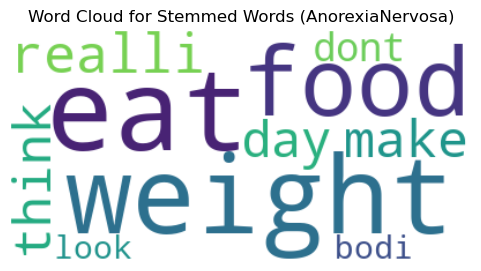

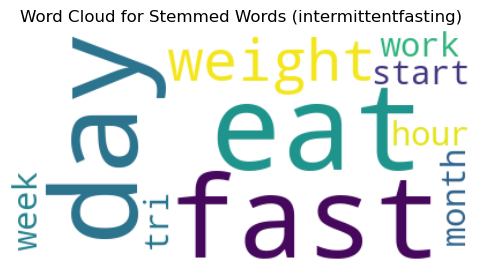

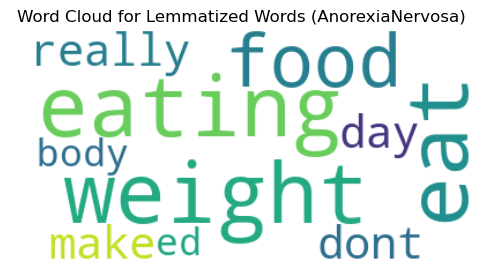

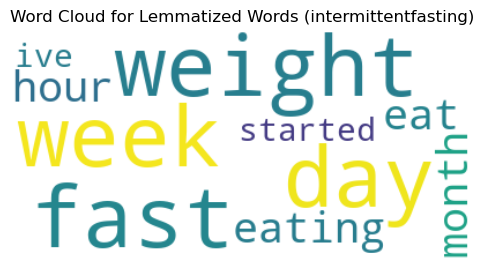

In [49]:
# Using the function above, generate word clouds for:

## Top unigrams (stemmed) in r/AnorexiaNervosa
word_cloud(top_stemmed['AnorexiaNervosa'], 'Word Cloud for Stemmed Words (AnorexiaNervosa)')

## Top unigrams (stemmed) in r/intermittentfasting
word_cloud(top_stemmed['intermittentfasting'], 'Word Cloud for Stemmed Words (intermittentfasting)')

## Top unigrams (lemmatized) in r/AnorexiaNervosa
word_cloud(top_lemmatized['AnorexiaNervosa'], 'Word Cloud for Lemmatized Words (AnorexiaNervosa)')

## Top unigrams (lemmatized) in r/intermittentfasting
word_cloud(top_lemmatized['intermittentfasting'], 'Word Cloud for Lemmatized Words (intermittentfasting)')

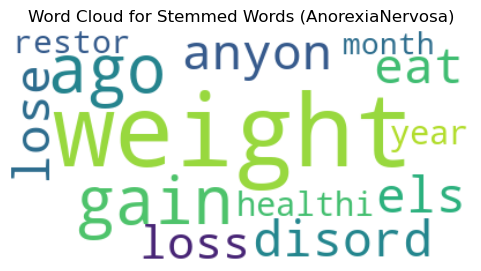

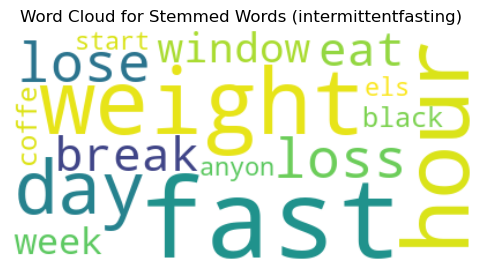

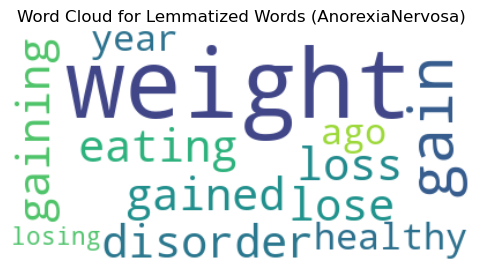

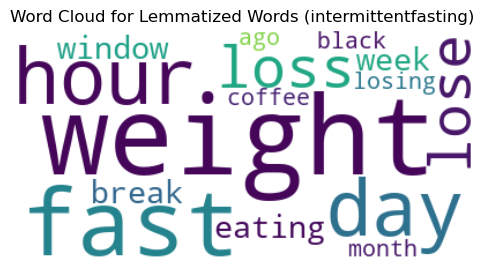

In [56]:
## Top bigrams (stemmed) in r/AnorexiaNervosa
word_cloud(top_bigrams_stemmed['AnorexiaNervosa'], 'Word Cloud for Stemmed Words (AnorexiaNervosa)')

## Top bigrams (stemmed) in r/intermittentfasting
word_cloud(top_bigrams_stemmed['intermittentfasting'], 'Word Cloud for Stemmed Words (intermittentfasting)')

## Top bigrams (lemmatized) in r/AnorexiaNervosa
word_cloud(top_bigrams_lemmatized['AnorexiaNervosa'], 'Word Cloud for Lemmatized Words (AnorexiaNervosa)')

## Top bigrams (lemmatized) in r/intermittentfasting
word_cloud(top_bigrams_lemmatized['intermittentfasting'], 'Word Cloud for Lemmatized Words (intermittentfasting)')

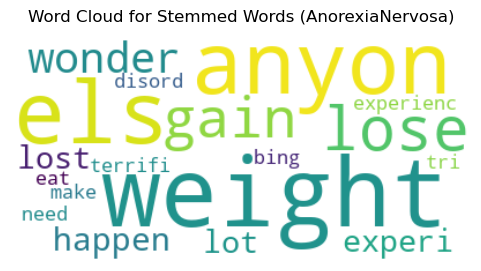

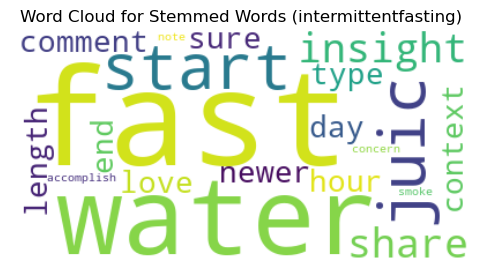

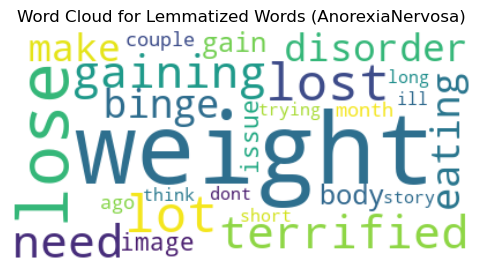

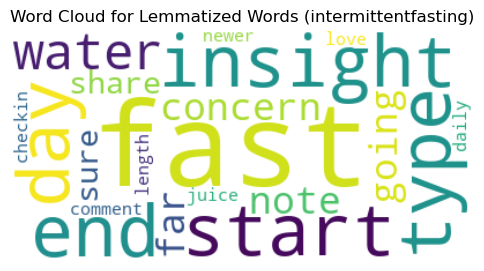

In [57]:
## Top trigrams (stemmed) in r/AnorexiaNervosa
word_cloud(top_trigrams_stemmed['AnorexiaNervosa'], 'Word Cloud for Stemmed Words (AnorexiaNervosa)')

## Top trigrams (stemmed) in r/intermittentfasting
word_cloud(top_trigrams_stemmed['intermittentfasting'], 'Word Cloud for Stemmed Words (intermittentfasting)')

## Top trigrams (lemmatized) in r/AnorexiaNervosa
word_cloud(top_trigrams_lemmatized['AnorexiaNervosa'], 'Word Cloud for Lemmatized Words (AnorexiaNervosa)')

## Top trigrams (lemmatized) in r/intermittentfasting
word_cloud(top_trigrams_lemmatized['intermittentfasting'], 'Word Cloud for Lemmatized Words (intermittentfasting)')

In [53]:
# Definte a function to generate vertical bar graph

def bar_graph(data, title, xlabel, ylabel):
    for column in data.columns:
        plt.figure(figsize=(10, 5))
        data[column].plot(kind='bar')
        plt.title(f'{title} ({column})')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

In [ ]:
#bar_graph(top_stemmed, 'Top Stemmed Words by Subreddit', 'Words', 'Count')
#bar_graph(top_lemmatized, 'Top Lemmatized Words by Subreddit', 'Words', 'Count')

In [60]:
reddits.to_csv('reddits.csv', index=False)